In [1]:
import pandas as pd
t={} # słownik dataframeów
for i in range(2015,2020):
    t[i]=pd.read_csv(f"{i}.csv")

In [2]:
for i in range(2015,2020):
    print(f"rok {i}:\n")
    print(t[i].info())
    print(t[i].describe())

rok 2015:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memo

Widać, że zmieniają się liczby kolumn i rekordów, co więcej nazwy kolumn z tym samym typem danych zmienia się w zależności od roku. Ponieważ nie we wszystkich danych jest błąd standardowy, lub inna miara niepewności, nie będę jej brał potem pod uwagę

In [3]:
def flatten(t):
    return [item for sublist in t for item in sublist]
namesExcept2015 = list(set(flatten([list(t[j].columns) for j in range(2016,2020)]))-{"Standard Error"})
goodNamesList=list(t[2015].columns)
goodNamesList.remove("Standard Error")
badNamesList=[name for name in namesExcept2015 if name not in t[2015].columns]
print(goodNamesList, "\n\n", badNamesList)
colNameUnificationDict={'Country or region':'Country', 
                        'Happiness.Score': 'Happiness Score', 
                        'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
                        'Dystopia.Residual':'Dystopia Residual',
                        'Freedom to make life choices':'Freedom',
                        'Happiness.Rank':'Happiness Rank',
                        'Overall rank':'Happiness Rank',
                        'Healthy life expectancy':'Health (Life Expectancy)',
                        'Score':'Happiness Score',
                        'GDP per capita':'Economy (GDP per Capita)',
                        'Social support':'Family',
                        'Perceptions of corruption':'Trust (Government Corruption)',
                        'Trust..Government.Corruption.':'Trust (Government Corruption)',
                        'Health..Life.Expectancy.':'Health (Life Expectancy)'
                       }
for df in t.values():
    df.rename(columns = colNameUnificationDict, inplace=True)
    if "Region" not in df.columns:
        df["Region"]=None
    if "Dystopia Residual" not in df.columns:
        df["Dystopia Residual"]=0

['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 

 ['Lower Confidence Interval', 'Overall rank', 'Score', 'GDP per capita', 'Whisker.low', 'Social support', 'Health..Life.Expectancy.', 'Happiness.Score', 'Freedom to make life choices', 'Healthy life expectancy', 'Trust..Government.Corruption.', 'Whisker.high', 'Happiness.Rank', 'Upper Confidence Interval', 'Dystopia.Residual', 'Country or region', 'Economy..GDP.per.Capita.', 'Perceptions of corruption']


In [4]:
for i in range(2015,2020):
    t[i]=t[i].loc[:,goodNamesList]

In [5]:
countryRegionDict={row["Country"]:row['Region'] for index, row in t[2015].iterrows()}
for i in range(2017,2020):
    for index, row in t[i].iterrows():
        try:
            t[i].at[index, "Region"]=countryRegionDict[row["Country"]]
        except:
            print(row["Country"]) 
for i in range(2015,2020):
    t[i]["Year"]=i

Taiwan Province of China
Belize
Hong Kong S.A.R., China
Somalia
Namibia
South Sudan
Trinidad & Tobago
Belize
Northern Cyprus
Somalia
Namibia
South Sudan
Trinidad & Tobago
Northern Cyprus
North Macedonia
Somalia
Namibia
Gambia
South Sudan


In [6]:
dfUnified = pd.concat(t)

# Po wstępnym czyszczeniu danych, możemy przystąpić do analizy. 
### Najpierw chcę zobaczyć ogólny kształt ramki danych itp.

In [7]:
dfUnified.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 782 entries, (2015, 0) to (2019, 155)
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        782 non-null    object 
 1   Region                         763 non-null    object 
 2   Happiness Rank                 782 non-null    int64  
 3   Happiness Score                782 non-null    float64
 4   Economy (GDP per Capita)       782 non-null    float64
 5   Family                         782 non-null    float64
 6   Health (Life Expectancy)       782 non-null    float64
 7   Freedom                        782 non-null    float64
 8   Trust (Government Corruption)  781 non-null    float64
 9   Generosity                     782 non-null    float64
 10  Dystopia Residual              782 non-null    float64
 11  Year                           782 non-null    int64  
dtypes: float64(8), int64(2), object(2)

In [8]:
dfUnified.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576,1.257771,2016.993606
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321,1.115230,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.054000,0.130000,0.000000,2016.000000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982,1.598425,2017.000000
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832,2.202105,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,3.837720,2019.000000


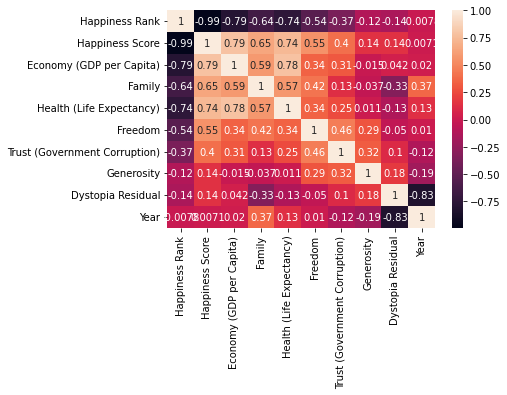

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = dfUnified.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Wiemy że happiness score jest sumą poszczególnych elementów naszej tabelki, więc nie dziwi wysoka korelacja między happiness score a pozostałymi elementami. Dziwi natomiast  bardzo słaba korelacja między happiness score, a generocity. wsp. korelacji między rokiem a zmienną family znacznie  większy od pozostałych sugeruje, że założenie o tym, że social support jest odpowiednikiem family, może być błędne.

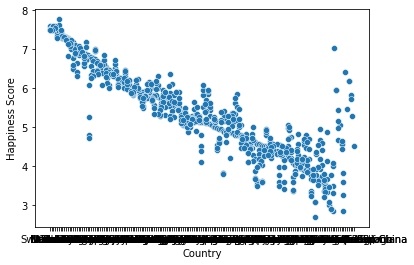

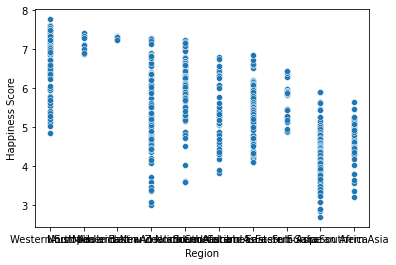

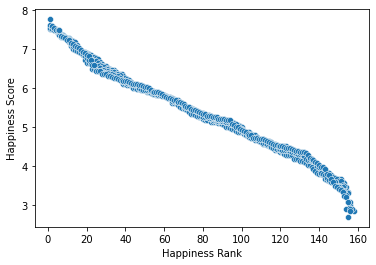

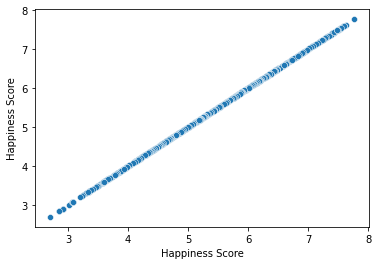

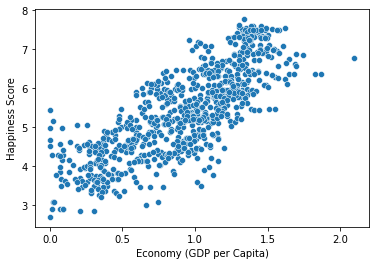

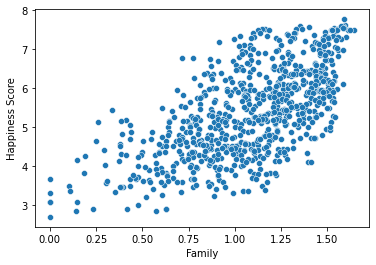

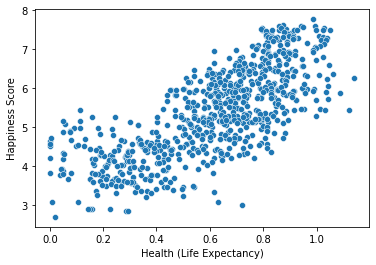

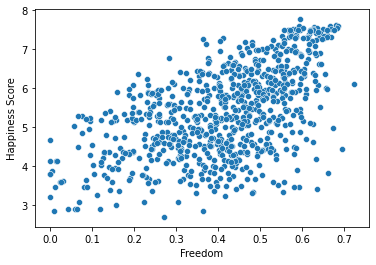

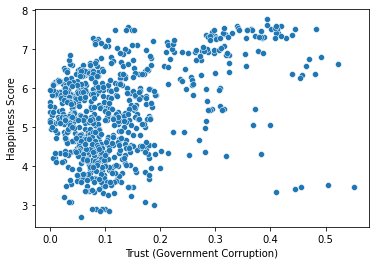

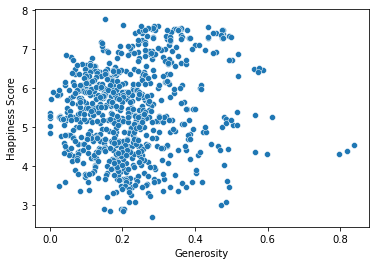

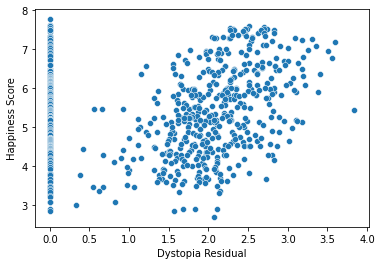

In [16]:
%matplotlib inline
for i in goodNamesList:
    sns.scatterplot(data=dfUnified, x=i, y="Happiness Score")
    plt.show()

<AxesSubplot:xlabel='Year', ylabel='Family'>

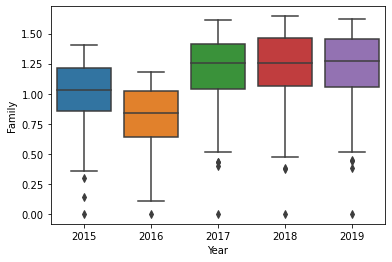

In [18]:
sns.boxplot(data=dfUnified, x='Year', y='Family' )

największe zmiany między poszczególnymi latami dla boxów ze zmienną family są w latach, kiedy zmienna ta była nazwana family Podobieństwo boxów z roku 2017 do tych z 2018 i 2020 sugeruje, że moje założenie o tożsamości zmiennych family i social support mogło być poprawne, a korelacja z latami wynika z bardziej subtelnych różnic, takich jak rodzaj zadawanych pytań dotyczących rodziny na przestrzeni lat.

# Lista hipotez i pytań dotyczących danych które zamierzam sprawdzić:
* Region wpływa znacząco na ekonomię, a co za tym idzie na poczucie szczęścia
* Poziom sczęścia w krajach mniej szczęśliwych zwiększa się na przestrzeni lat 
* Jaki kraj poprawił, a jaki pogorszył swoją pozycję najmocniej na przestrzeni lat 
* Czy Poziom szczęścia w Polsce się zwiększa, czy zmniejsza? Jak to wygląda na tle pozostałych państw?
* jakie kraje są najszczęśliwsze, a jakie najmniej szczęśliwe w roku 2019?


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'Middle East and Northern Africa'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Southeastern Asia'),
  Text(6, 0, 'Central and Eastern Europe'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

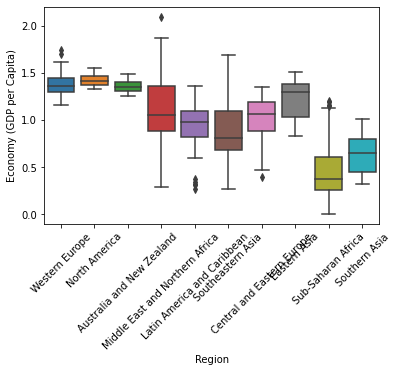

In [22]:
sns.boxplot(data=dfUnified, x='Region', y= 'Economy (GDP per Capita)')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'Middle East and Northern Africa'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Southeastern Asia'),
  Text(6, 0, 'Central and Eastern Europe'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

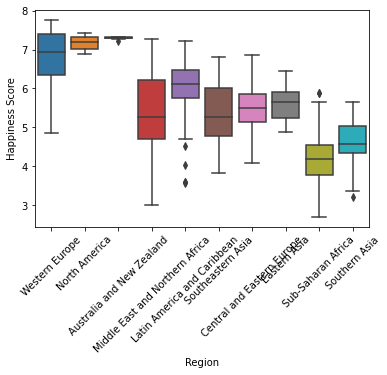

In [29]:
sns.boxplot(data=dfUnified, x='Region', y= 'Happiness Score')
plt.xticks(rotation=45)

Widzimy, że nasze oba wykresy są bardzo podobne, więc region faktycznie ma znaczący wpływ na szczęście, głównie przez ekonomię.

In [38]:
import numpy as np
happiness2015 = dfUnified.loc[dfUnified['Year']==2015]["Happiness Score"]
happiness2019 = dfUnified.loc[dfUnified['Year']==2019]["Happiness Score"]
print(np.quantile(happiness2015, 0.1), np.quantile(happiness2019, 0.1))
print(np.quantile(happiness2015, 0.9), np.quantile(happiness2019, 0.9))

3.9015999999999997 3.995
6.9571000000000005 7.003


Widzimy że kwantyl rzędu 0.1 poziomu szczęścia wzrósł o około 0.09, podczas gdy kwantyl rzędu 0.9 poziomu szczęścia wzrósł o około 0.04. sugeruje to szybszy wzrost poziomu szczęścia wśród krajów nieszczęśliwych, co za tym idzie wyrównywanie się nierówności na świecie, jednak pokazuje również powolność tego procesu.

In [77]:
Countries2019= list(dfUnified.loc[dfUnified['Year']==2019]["Country"])
CountriesThatExist =[country for country in dfUnified.loc[dfUnified['Year']==2015]["Country"] 
                     if country in Countries2019]
dfc=pd.DataFrame({"Country": CountriesThatExist})
dfc["2015 Rank"]=dfUnified.loc[(dfUnified['Year']==2015)]\
    .set_index("Country")\
    .loc[CountriesThatExist,:]\
    .reset_index()["Happiness Rank"]
dfc["2019 Rank"]=dfUnified.loc[(dfUnified['Year']==2019)]\
    .set_index("Country")\
    .loc[CountriesThatExist,:]\
    .reset_index()["Happiness Rank"]
dfc["2015 Score"]=dfUnified.loc[(dfUnified['Year']==2015)]\
    .set_index("Country")\
    .loc[CountriesThatExist,:]\
    .reset_index()["Happiness Score"]
dfc["2019 Score"]=dfUnified.loc[(dfUnified['Year']==2019)]\
    .set_index("Country")\
    .loc[CountriesThatExist,:]\
    .reset_index()["Happiness Score"]
dfc["Rank Difference"]=dfc["2015 Rank"]-dfc["2019 Rank"]
dfc["Score Difference"]=dfc["2019 Score"]-dfc["2015 Score"]
print(dfc.iloc[dfc['Rank Difference'].idxmax(),:])
print(dfc.iloc[dfc['Rank Difference'].idxmin(),:])

Country             Benin
2015 Rank             155
2019 Rank             102
2015 Score           3.34
2019 Score          4.883
Rank Difference        53
Score Difference    1.543
Name: 145, dtype: object
Country             Venezuela
2015 Rank                  23
2019 Rank                 108
2015 Score               6.81
2019 Score              4.707
Rank Difference           -85
Score Difference       -2.103
Name: 21, dtype: object


Widzimy, że szczęście najbardziej poprawiło się w Beninie (Na wikipedii możemy przeczytać, że państwo to jest rzadkim przykładem udanego przejścia do demokracji w Afryce), a najbardziej pogorszyło się szczęście w wenwzueli (pogrążonej hiperinflacją i kryzysami w ostatnim czasie)

In [78]:
dfc.loc[dfc["Country"]=="Poland"]

,Country,2015 Rank,2019 Rank,2015 Score,2019 Score,Rank Difference,Score Difference
56,Poland,60,40,5.791,6.182,20,0.391


Poziom szczęścia w Polsce Poprawił się na tle innych państw, jak również w Polsce samej w sobie

In [80]:
dfUnified.loc[dfUnified["Year"]==2019].sort_values("Happiness Score")

Country              Region  Happiness Rank  \
2019 155               South Sudan                None             156   
     154  Central African Republic  Sub-Saharan Africa             155   
     153               Afghanistan       Southern Asia             154   
     152                  Tanzania  Sub-Saharan Africa             153   
     151                    Rwanda  Sub-Saharan Africa             152   
...                            ...                 ...             ...   
     4                 Netherlands      Western Europe               5   
     3                     Iceland      Western Europe               4   
     2                      Norway      Western Europe               3   
     1                     Denmark      Western Europe               2   
     0                     Finland      Western Europe               1   

          Happiness Score  Economy (GDP per Capita)  Family  \
2019 155            2.853                     0.306   0.575   
     154            3.083                     0.026   0.000   
     153            3.203                     0.350   0.517   
     152            3.231                     0.476   0.885   
     151            3.334                     0.359   0.711   
...                   ...                       ...     ...   
     4              7.488                     1.396   1.522   
     3              7.494                     1.380   1.624   
     2              7.554                     1.488   1.582   
     1              7.600                     1.383   1.573   
     0              7.769                     1.340   1.587   

          Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
2019 155                     0.295    0.010                          0.091   
     154                     0.105    0.225                          0.035   
     153                     0.361    0.000                          0.025   
     152                     0.499    0.417                          0.147   
     151                     0.614    0.555                          0.411   
...                            ...      ...                            ...   
     4                       0.999    0.557                          0.298   
     3                       1.026    0.591                          0.118   
     2                       1.028    0.603                          0.341   
     1                       0.996    0.592                          0.410   
     0                       0.986    0.596                          0.393   

          Generosity  Dystopia Residual  Year  
2019 155       0.202                0.0  2019  
     154       0.235                0.0  2019  
     153       0.158                0.0  2019  
     152       0.276                0.0  2019  
     151       0.217                0.0  2019  
...              ...                ...   ...  
     4         0.322                0.0  2019  
     3         0.354                0.0  2019  
     2         0.271                0.0  2019  
     1         0.252                0.0  2019  
     0         0.153                0.0  2019  

[156 rows x 12 columns]

Widzimy, że najszczęśliwsze kraje to państwa skandynawskie, oraz Holandia, natomiast kraje najmniej szczęśliwe to państwa afryki subsaharyjskiej oraz Afganistan 